In [1]:
# 导入处理数据包
import numpy as np
import pandas as pd
import os
# 导入数据
#训练数据集
train = pd.read_csv(r"C:\Users\win11\qgzouxt\train.csv")
#测试数据集
test = pd.read_csv(r"C:\Users\win11\qgzouxt\test.csv")
print ('训练数据集:',train.shape,'测试数据集:',test.shape)

训练数据集: (891, 12) 测试数据集: (418, 11)


In [2]:
rowNum_train=train.shape[0]
rowNum_test=test.shape[0]
print('训练数据集有多少行数据：',rowNum_train,
     ',测试数据集有多少行数据：',rowNum_test,)
print(type(train))
print(type(test))

训练数据集有多少行数据： 891 ,测试数据集有多少行数据： 418
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [3]:
# 合并数据集，方便同时对两个数据集进行清洗
full = train._append( test , ignore_index = True )
print ('合并后的数据集:',full.shape)
print(full['Sex'].unique())

合并后的数据集: (1309, 12)
['male' 'female']


In [4]:
# 查看数据
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#获取数据类型列的描述统计信息，只能查看数据类型的描述统计信息
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
# 查看每一列的数据类型，和数据总数
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#数据清洗

In [7]:
# 对比缺失值处理前后结果
print('处理前')
full.info()

处理前
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [8]:
#年龄(Age)
full['Age']=full['Age'].fillna( full['Age'].mean() )
#票价(Fare)
full['Fare'] = full['Fare'].fillna( full['Fare'].mean() )
print('处理后：')
full.info()

处理后：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [9]:
# 检查数据处理是否正常
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#港口（Embarked）：查看里面的数据
full['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [11]:
#查看常见的类别：
full['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [12]:
#填充缺失：
full['Embarked'] = full['Embarked'].fillna( 'S' )

In [13]:
#查看数据:
full['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [14]:
#填充缺失值：
full['Cabin'] = full['Cabin'].fillna( 'U' )
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#特征提取


In [15]:
#查看数据类型：
full.info()
#male对应数值1，female对应数值0
sex_mapDict={'male':1,
             'female':0}
#map函数：对Series每个数据应用自定义的函数计算
full['Sex']=full['Sex'].map(sex_mapDict)
full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,S


In [16]:
#存放提取后的特征
embarkedDf = pd.DataFrame()
#使用get_dummies进行one-hot编码，产生虚拟变量（dummy variables），列名前缀是Embarked
embarkedDf = pd.get_dummies( full['Embarked'] , prefix='Embarked' )
embarkedDf.head()

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [17]:
#添加one-hot编码产生的虚拟变量到泰坦尼克号数据集full
full = pd.concat([full,embarkedDf],axis=1)
full.drop('Embarked',axis=1,inplace=True)
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,False,False,True
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,False,False,True
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,False,False,True


In [18]:
#存放提取后的特征
pclassDf = pd.DataFrame()
#使用get_dummies进行one-hot编码，列名前缀是Pclass
pclassDf = pd.get_dummies( full['Pclass'] , prefix='Pclass' )
pclassDf.head()

,Pclass_1,Pclass_2,Pclass_3
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True


In [19]:
#添加one-hot编码产生的虚拟变量（dummy variables）到泰坦尼克号数据集full
full = pd.concat([full,pclassDf],axis=1)
#删掉客舱等级（Pclass）这一列
full.drop('Pclass',axis=1,inplace=True)
full.head()


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,False,False,True,False,False,True
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,True,False,False,True,False,False
2,3,1.0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,False,False,True,False,False,True
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,False,True,True,False,False
4,5,0.0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,False,False,True,False,False,True


In [20]:
#查看乘客名字格式
full[ 'Name' ].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [21]:
#从姓名中获取头衔
def getTitle(name):
    str1=name.split( ',' )[1] #Mr. Owen Harris
    str2=str1.split( '.' )[0]#Mr
    #strip() 方法用于移除字符串头尾指定的字符
    str3=str2.strip()
    return str3
#存放提取后的特征
titleDf = pd.DataFrame()
#map函数：对Series每个数据应用自定义的函数计算
titleDf['Title'] = full['Name'].map(getTitle)
titleDf.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [22]:
#姓名中头衔字符串与定义头衔类别的映射关系
title_mapDict = {   "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }

#对Series每个数据应用自定义的函数计算
titleDf['Title'] = titleDf['Title'].map(title_mapDict)
#使用get_dummies进行one-hot编码
titleDf = pd.get_dummies(titleDf['Title'])
titleDf.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,False,False,True,False,False,False
1,False,False,False,True,False,False
2,False,True,False,False,False,False
3,False,False,False,True,False,False
4,False,False,True,False,False,False


In [23]:
#添加one-hot编码产生的虚拟变量（dummy variables）到泰坦尼克号数据集full
full = pd.concat([full,titleDf],axis=1)
#删掉姓名这一列
full.drop('Name',axis=1,inplace=True)
full.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,...,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0.0,1,22.0,1,0,A/5 21171,7.2500,U,False,...,True,False,False,True,False,False,True,False,False,False
1,2,1.0,0,38.0,1,0,PC 17599,71.2833,C85,True,...,False,True,False,False,False,False,False,True,False,False
2,3,1.0,0,26.0,0,0,STON/O2. 3101282,7.9250,U,False,...,True,False,False,True,False,True,False,False,False,False
3,4,1.0,0,35.0,1,0,113803,53.1000,C123,False,...,True,True,False,False,False,False,False,True,False,False
4,5,0.0,1,35.0,0,0,373450,8.0500,U,False,...,True,False,False,True,False,False,True,False,False,False


In [24]:
#查看客舱号的内容
full['Cabin'].head()

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

In [25]:
#存放客舱号信息
cabinDf = pd.DataFrame()
#客场号的类别值是首字母
full[ 'Cabin' ] = full[ 'Cabin' ].map( lambda c : c[0] )
#使用get_dummies进行one-hot编码，列名前缀是Cabin
cabinDf = pd.get_dummies( full['Cabin'] , prefix = 'Cabin' )
cabinDf.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,False,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True


In [26]:
#添加one-hot编码产生的虚拟变量（dummy variables）到泰坦尼克号数据集full
full = pd.concat([full,cabinDf],axis=1)
#删掉客舱号这一列
full.drop('Cabin',axis=1,inplace=True)
full.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,...,Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0.0,1,22.0,1,0,A/5 21171,7.2500,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1.0,0,38.0,1,0,PC 17599,71.2833,True,False,...,False,False,False,True,False,False,False,False,False,False
2,3,1.0,0,26.0,0,0,STON/O2. 3101282,7.9250,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1.0,0,35.0,1,0,113803,53.1000,False,False,...,False,False,False,True,False,False,False,False,False,False
4,5,0.0,1,35.0,0,0,373450,8.0500,False,False,...,False,False,False,False,False,False,False,False,False,True


In [27]:
#存放家庭信息
familyDf = pd.DataFrame()
familyDf[ 'FamilySize' ] = full[ 'Parch' ] + full[ 'SibSp' ] + 1
#if条件为真的时候返回if前面内容，否则返回0
familyDf[ 'Family_Single' ] = familyDf[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
familyDf[ 'Family_Small' ]  = familyDf[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
familyDf[ 'Family_Large' ]  = familyDf[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )
#添加one-hot编码产生的虚拟变量（dummy variables）到泰坦尼克号数据集full
full = pd.concat([full,familyDf],axis=1)
full.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,FamilySize,Family_Single,Family_Small,Family_Large
0,1,0.0,1,22.0,1,0,A/5 21171,7.2500,False,False,...,False,False,False,False,False,True,2,0,1,0
1,2,1.0,0,38.0,1,0,PC 17599,71.2833,True,False,...,False,False,False,False,False,False,2,0,1,0
2,3,1.0,0,26.0,0,0,STON/O2. 3101282,7.9250,False,False,...,False,False,False,False,False,True,1,1,0,0
3,4,1.0,0,35.0,1,0,113803,53.1000,False,False,...,False,False,False,False,False,False,2,0,1,0
4,5,0.0,1,35.0,0,0,373450,8.0500,False,False,...,False,False,False,False,False,True,1,1,0,0


In [28]:
full.shape

(1309, 33)

#特征选择

In [29]:
#除去ticket行
full = full.drop('Ticket', axis=1)
#相关性矩阵
corrDf = full.corr()
#查看各个特征与生存情况（Survived）的相关系数，并降序排列
corrDf['Survived'].sort_values(ascending =False)

Survived         1.000000
Mrs              0.344935
Miss             0.332795
Pclass_1         0.285904
Family_Small     0.279855
Fare             0.257307
Cabin_B          0.175095
Embarked_C       0.168240
Cabin_D          0.150716
Cabin_E          0.145321
Cabin_C          0.114652
Pclass_2         0.093349
Master           0.085221
Parch            0.081629
Cabin_F          0.057935
Royalty          0.033391
Cabin_A          0.022287
FamilySize       0.016639
Cabin_G          0.016040
Embarked_Q       0.003650
PassengerId     -0.005007
Cabin_T         -0.026456
Officer         -0.031316
SibSp           -0.035322
Age             -0.070323
Family_Large    -0.125147
Embarked_S      -0.149683
Family_Single   -0.203367
Cabin_U         -0.316912
Pclass_3        -0.322308
Sex             -0.543351
Mr              -0.549199
Name: Survived, dtype: float64

In [30]:
#特征选择
full_X = pd.concat( [titleDf,#头衔
                     pclassDf,#客舱等级
                     familyDf,#家庭大小
                     full['Fare'],#船票价格
                     cabinDf,#船舱号
                     embarkedDf,#登船港口
                     full['Sex']#性别
                    ] , axis=1 )
#查看选择特征的数据集
full_X.head()

,Master,Miss,Mr,Mrs,Officer,Royalty,Pclass_1,Pclass_2,Pclass_3,FamilySize,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Sex
0,False,False,True,False,False,False,False,False,True,2,...,False,False,False,False,False,True,False,False,True,1
1,False,False,False,True,False,False,True,False,False,2,...,False,False,False,False,False,False,True,False,False,0
2,False,True,False,False,False,False,False,False,True,1,...,False,False,False,False,False,True,False,False,True,0
3,False,False,False,True,False,False,True,False,False,2,...,False,False,False,False,False,False,False,False,True,0
4,False,False,True,False,False,False,False,False,True,1,...,False,False,False,False,False,True,False,False,True,1


#模型

In [31]:
sourceRow=891
#原始数据集：特征
source_X = full_X.loc[0:sourceRow-1,:]
#原始数据集：标签
source_y = full.loc[0:sourceRow-1,'Survived']   
#预测数据集：特征
pred_X = full_X.loc[sourceRow:,:]
#原始数据集有多少行
print('原始数据集有多少行:',source_X.shape[0])
#预测数据集有多少行
print('预测数据集有多少行:',pred_X.shape[0])

原始数据集有多少行: 891
预测数据集有多少行: 418


In [32]:
from sklearn.model_selection import train_test_split 
#建立模型用的训练数据集和测试数据集
train_X, test_X, train_y, test_y = train_test_split(source_X ,
                                                    source_y,
                                                    train_size=.8)
#输出数据集大小
print ('原始数据集特征：',source_X.shape, 
       '训练数据集特征：',train_X.shape ,
      '测试数据集特征：',test_X.shape)
print ('原始数据集标签：',source_y.shape, 
       '训练数据集标签：',train_y.shape ,
      '测试数据集标签：',test_y.shape)


原始数据集特征： (891, 27) 训练数据集特征： (712, 27) 测试数据集特征： (179, 27)
原始数据集标签： (891,) 训练数据集标签： (712,) 测试数据集标签： (179,)


In [33]:
#原始数据标签查看
source_y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [34]:
#第1步：导入算法
from sklearn.linear_model import LogisticRegression
#第2步：创建模型：逻辑回归（logisic regression）
model = LogisticRegression(max_iter=1000)
#第3步：训练模型
model.fit( train_X , train_y )

LogisticRegression(max_iter=1000)

In [35]:
# 分类问题，score得到的是模型的正确率
model.score(test_X , test_y )

0.8324022346368715

In [36]:
#使用机器学习模型，对预测数据集中的生存情况进行预测
pred_Y = model.predict(pred_X)
pred_Y=pred_Y.astype(int)
#乘客id
passenger_id = full.loc[sourceRow:,'PassengerId']
#数据框：乘客id，预测生存情况的值
predDf = pd.DataFrame( 
    { 'PassengerId': passenger_id , 
     'Survived': pred_Y } )
predDf.shape
predDf.head()

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1


In [37]:
#保存结果
predDf.to_csv( 'titanic_pred.csv' , index = False )

#数据可视化

In [38]:
import matplotlib.pyplot as plt
num_Survived=train['Survived'].value_counts() 
print('原始数据的生存情况为：\n',num_Survived) 

原始数据的生存情况为：
 Survived
0    549
1    342
Name: count, dtype: int64


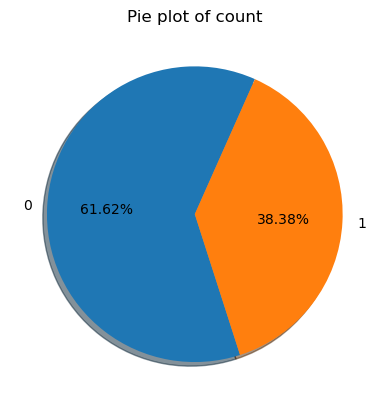

In [40]:
#创建一个作饼状图的函数 
def pie(series):
    #创建画板1
    fig=plt.figure(1)
    #创建画纸，并选择画纸1
    ax=plt.subplot(111)   
    #标签
    label=series.index 
    #添加标题 
    name=series.name
    #在画纸1上绘饼状图
    plt.pie(x=series,
            labels=label,
            autopct='%3.2f%%',#数值保留固定小数位 
            shadow=True,
            startangle=66,#逆时针起始角度设置
            pctdistance=0.6) #数值距圆心半径倍数的距离
    plt.title('Pie plot of %s'%name)
    #为生存情况绘制饼图
pie(num_Survived)

Survived          0      1
Title                     
Capt            1.0    NaN
Col             1.0    1.0
Don             1.0    NaN
Dr              4.0    3.0
Jonkheer        1.0    NaN
Lady            NaN    1.0
Major           1.0    1.0
Master         17.0   23.0
Miss           55.0  127.0
Mlle            NaN    2.0
Mme             NaN    1.0
Mr            436.0   81.0
Mrs            26.0   99.0
Ms              NaN    1.0
Rev             6.0    NaN
Sir             NaN    1.0
the Countess    NaN    1.0


Text(0, 0.5, 'Title')

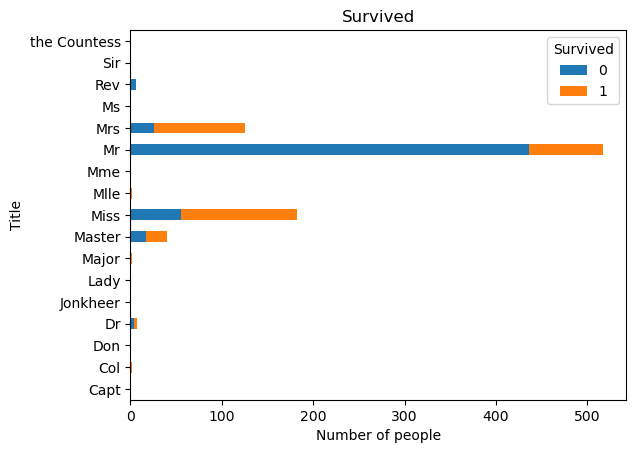

In [41]:
#头衔对生还率的影响情况
train['Title'] = train['Name'].map(getTitle)
#用groupby()整理数据 
num_Title_Survived=train.groupby(['Title','Survived'])['Survived'].count().unstack() 
print(num_Title_Survived) 
#作条形图 
num_Title_Survived.plot(kind='barh',stacked=True) 
#添加标题、y轴标签 
plt.title('Survived')
plt.xlabel('Number of people')
plt.ylabel('Title')

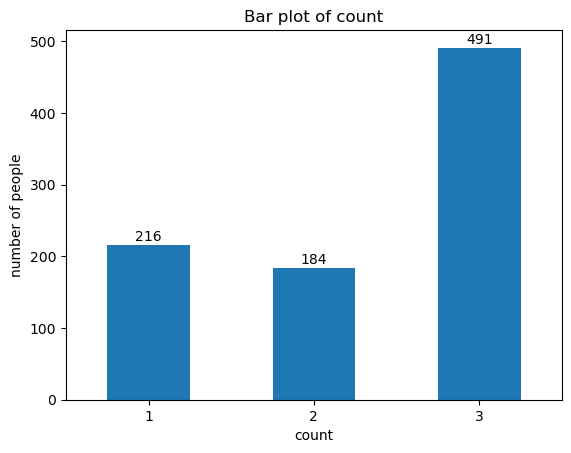

In [42]:
#创建条形图函数 
def Bar(series): 
    fig=plt.figure(1)
    ax=plt.subplot(111)   
    #用plot()函数作条形图 
    series.plot(kind='bar') 
    #标签 
    label=series.index 
    #设置x轴标签垂直
    ax.set_xticklabels(label,rotation="horizontal") 
    #标题 
    name=series.name 
    ax.set_title('Bar plot of %s'%name)
    #添加x、y轴标签 
    ax.set_ylabel('number of people') 
    ax.set_xlabel('%s'%name)
    #数据标签
    x=range(0,3)#类别数量为3
    #设置y轴的数值，需将Pclass列的数据先转化为数列，再转化为矩阵格式
    y=series
    for a,b in zip(x,y):
        plt.text(a, b+1, '%d'%b, ha='center', va= 'bottom',fontsize=10)
#各等级客舱人数
num_Pclass=train['Pclass'].value_counts().sort_index() 
Bar(num_Pclass)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

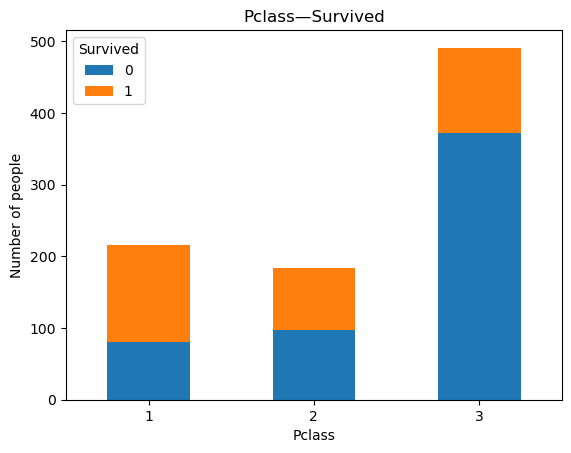

In [43]:
#各等级客舱的生存率
num_Pclass_Survied=train.groupby(['Pclass','Survived'])['Survived'].count().unstack() 
print(num_Pclass_Survied) 
num_Pclass_Survied.plot(kind='bar',stacked=True) #stacked=True 堆积柱形图
#添加标题，y轴标签 
plt.title('Pclass—Survived') 
plt.ylabel('Number of people')
plt.xticks(rotation=0)


FamilySize  Survived
1           0           374
            1           163
2           0            72
            1            89
3           0            43
            1            59
4           0             8
            1            21
5           0            12
            1             3
6           0            19
            1             3
7           0             8
            1             4
8           0             6
11          0             7
Name: Survived, dtype: int64


Text(0, 0.5, 'Rate of Survived')

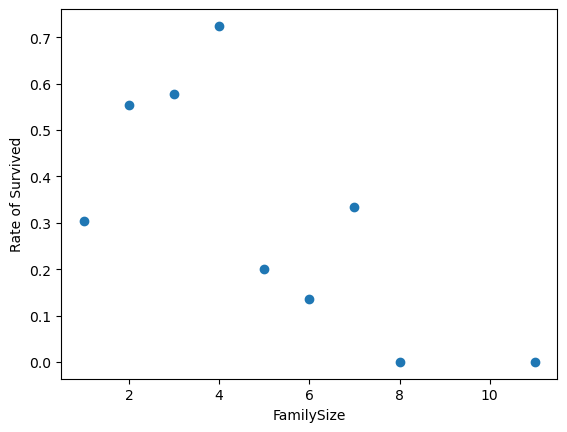

In [44]:
#新增一列FamilySize表示家庭大小
train[ 'FamilySize' ] = train[ 'Parch' ] + train[ 'SibSp' ] + 1
num_FamilySize_Survived=train.groupby(['FamilySize','Survived'])['Survived'].count()
print(num_FamilySize_Survived)
rate_Survived=[]
for i in range(1,8,1):
        rate_Survived.append((num_FamilySize_Survived[i][1])/(num_FamilySize_Survived[i][0]+num_FamilySize_Survived[i][1]))

x=[1,2,3,4,5,6,7,8,11]
rate_Survived.append(0)
rate_Survived.append(0)
y=rate_Survived
plt.scatter(x,y)
plt.xlabel('FamilySize')
plt.ylabel('Rate of Survived')

Text(0, 0.5, 'Number of people')

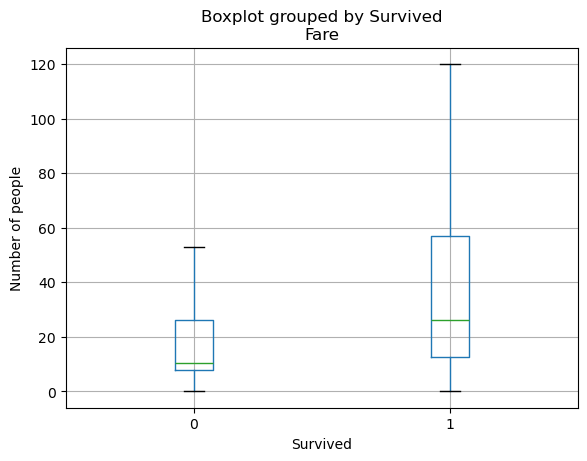

In [45]:
#作箱线图，showfliers显示异常值
train.boxplot(column='Fare',by='Survived',showfliers=False) 
#添加y轴标签 
plt.ylabel('Number of people')

Survived      0      1
Cabin                 
A           8.0    7.0
B          12.0   35.0
C          24.0   35.0
D           8.0   25.0
E           8.0   24.0
F           5.0    8.0
G           2.0    2.0
T           1.0    NaN
U         481.0  206.0


Text(0.5, 0, 'Number of people')

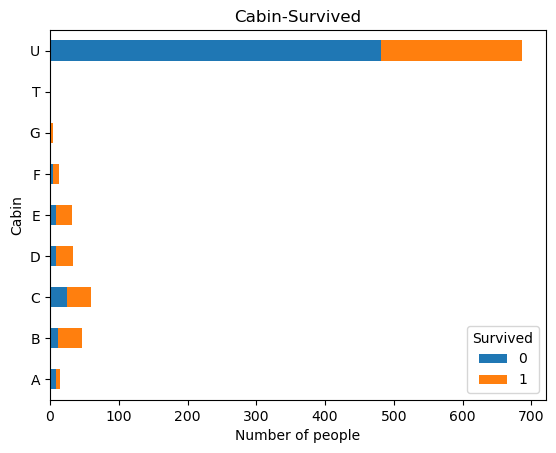

In [46]:
train1=train
train1['Cabin'] = train1['Cabin'].fillna( 'U' )
train1[ 'Cabin' ] = train1[ 'Cabin' ].map( lambda c : c[0] )
#利用groupby()整理数据 
num_Cabin_Survived=train1.groupby(['Cabin','Survived'])['Survived'].count().unstack() 
print(num_Cabin_Survived) 
#作条形图 
num_Cabin_Survived.plot(kind='barh',stacked=True) 
#添加标题、y轴标签 
plt.title('Cabin-Survived') 
plt.xlabel('Number of people')

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


(array([0, 1, 2]), [Text(0, 0, 'C'), Text(1, 0, 'Q'), Text(2, 0, 'S')])

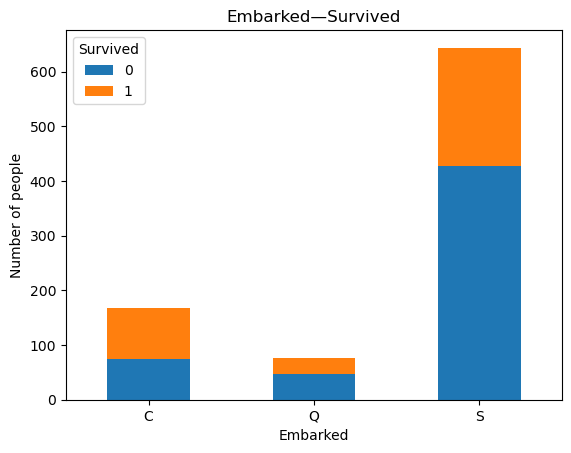

In [47]:
#各登船港口乘客的生存率
num_Embarked_Survied=train.groupby(['Embarked','Survived'])['Survived'].count().unstack() 
print(num_Embarked_Survied) 
num_Embarked_Survied.plot(kind='bar',stacked=True) #stacked=True 堆积柱形图
#添加标题，y轴标签 
plt.title('Embarked—Survived') 
plt.ylabel('Number of people')
plt.xticks(rotation=360)

Sex
male      577
female    314
Name: count, dtype: int64


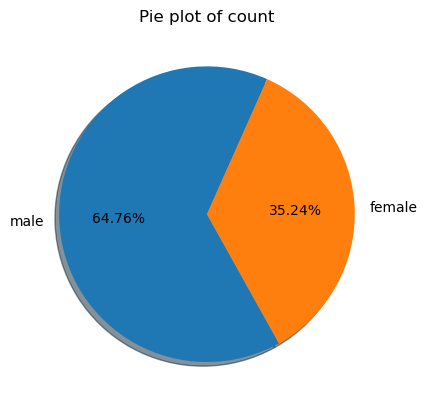

In [48]:
#性别对生存率的影响
Sex_count=train['Sex'].value_counts() 
print(Sex_count) 
pie(Sex_count)

Survived    0    1
Sex               
female     81  233
male      468  109


(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

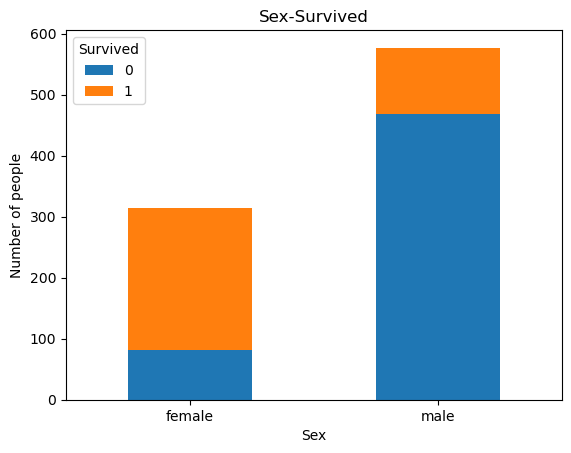

In [50]:
import pylab as pl
num_Sex_Survived=train.groupby(['Sex','Survived'])['Survived'].count().unstack() 
print(num_Sex_Survived) 
#作条形图 
num_Sex_Survived.plot(kind='bar',stacked=True) 
#添加标题、y轴标签 
plt.title('Sex-Survived') 
plt.ylabel('Number of people')
#将x轴标签转置成水平
pl.xticks(rotation=360)

#end.